# Task 2.0 - Linear Regression

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ## 1. Loading and exploring the data

In [61]:
train_data = pd.read_csv("C://Users//Niyathi//Downloads//Train.csv")
test_data = pd.read_csv("C://Users//Niyathi//Downloads//Test.csv")


In [62]:
train_data.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65


In [63]:
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (3750, 13)
Test data shape: (1250, 13)


In [64]:
# Check for missing values
print(train_data.isnull().sum())

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               28
Power                28
Seats                32
Price                 0
dtype: int64


# ## 2. Data Preprocessing
# cleaning and normalizing the data before using it

In [65]:
print("Data types:")
print(train_data.dtypes)

Data types:
Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


In [66]:
cols = ['Mileage', 'Engine', 'Power']

def clean_column(x):
    try:
        if isinstance(x, str):
            if x.strip().lower() == 'null':
                return np.nan
            return float(x.split()[0])
        elif isinstance(x, (int, float)):
            return float(x)
        else:
            return np.nan
    except:
        return np.nan


for col in cols:
    train_data[col] = train_data[col].apply(clean_column)
    test_data[col] = test_data[col].apply(clean_column)



In [67]:
print("After conversion:")
print("Mileage:", train_data['Mileage'].head())
print("Engine:", train_data['Engine'].head())
print("Power:", train_data['Power'].head())

After conversion:
Mileage: 0    23.84
1    18.49
2    15.00
3    17.20
4    21.02
Name: Mileage, dtype: float64
Engine: 0    1199.0
1    1493.0
2    1598.0
3    1396.0
4    1248.0
Name: Engine, dtype: float64
Power: 0     84.00
1    100.00
2    103.52
3     53.50
4     88.76
Name: Power, dtype: float64


In [68]:
print(train_data[cols].dtypes)

Mileage    float64
Engine     float64
Power      float64
dtype: object


# ### 2.1 Handling Missing Values

In [70]:
print("Missing values after cleaning:")
print(train_data.isnull().sum())

Missing values after cleaning:
Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               28
Power                98
Seats                32
Price                 0
dtype: int64


In [71]:
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
for col in numeric_cols:
    print(f"Median of {col}: {train_data[col].median()}")

Median of Year: 2014.0
Median of Kilometers_Driven: 53000.0
Median of Mileage: 18.0
Median of Engine: 1493.0
Median of Power: 98.59
Median of Seats: 5.0


In [72]:
for col in numeric_cols:
    train_data[col] = train_data[col].fillna(train_data[col].median())
    test_data[col] = test_data[col].fillna(train_data[col].median())  # Using train median for test data

In [73]:
print("Missing values after filling:")
print(train_data.isnull().sum())

Missing values after filling:
Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


# ### 2.2 One-hot Encoding Categorical Variables

In [74]:
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(train_data[col].value_counts())


Unique values in Fuel_Type:
Fuel_Type
Diesel      1998
Petrol      1751
Electric       1
Name: count, dtype: int64

Unique values in Transmission:
Transmission
Manual       2673
Automatic    1077
Name: count, dtype: int64

Unique values in Owner_Type:
Owner_Type
First             3083
Second             589
Third               73
Fourth & Above       5
Name: count, dtype: int64

Unique values in Location:
Location
Mumbai        491
Hyderabad     469
Coimbatore    424
Kochi         400
Pune          367
Kolkata       333
Delhi         319
Chennai       305
Jaipur        272
Bangalore     234
Ahmedabad     136
Name: count, dtype: int64


In [75]:
#one hot encoding
train_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_encoded = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

In [76]:
print(train_encoded.head())

   Unnamed: 0                                        Name  Year  \
0           0         Tata Tiago 1.2 Revotron XZ WO Alloy  2017   
1           1  Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT  2017   
2           2      Skoda Rapid 2013-2016 1.6 MPI Ambition  2014   
3           3                     Tata Indica V2 DLS BSII  2007   
4           4        Tata Manza Club Class Quadrajet90 LX  2013   

   Kilometers_Driven  Mileage  Engine   Power  Seats  Price  \
0              16500    23.84  1199.0   84.00    5.0   5.00   
1              47357    18.49  1493.0  100.00    7.0   8.37   
2              35000    15.00  1598.0  103.52    5.0   4.50   
3             200000    17.20  1396.0   53.50    5.0   0.85   
4              64000    21.02  1248.0   88.76    5.0   2.65   

   Fuel_Type_Electric  ...  Location_Bangalore  Location_Chennai  \
0               False  ...               False             False   
1               False  ...               False             False   
2             

In [77]:
print("Train columns:", len(train_encoded.columns))
print("Test columns:", len(test_encoded.columns))

missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
print(f"Columns in train but not in test: {missing_cols}")

Train columns: 25
Test columns: 25
Columns in train but not in test: set()


# ### 2.3 Preparing Features and Target Variable

In [78]:
X_train = train_encoded.drop(['Name', 'Price', 'Unnamed: 0'], axis=1)
y_train = train_encoded['Price']
X_test = test_encoded.drop(['Name', 'Price', 'Unnamed: 0'], axis=1)
y_test = test_encoded['Price']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3750, 22)
y_train shape: (3750,)
X_test shape: (1250, 22)
y_test shape: (1250,)


# ### 2.4 Feature Scaling

In [79]:
def standardize(X):
    X = np.array(X, dtype=float)
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    stds[stds < 1e-10] = 1.0
    return (X - means) / stds, means, stds

In [80]:
X_train_array = X_train.values  
X_test_array = X_test.values
X_train_scaled, means, stds = standardize(X_train_array)
X_test_scaled = (X_test_array - means) / stds

print("After scaling - X_train shape:", X_train_scaled.shape)

After scaling - X_train shape: (3750, 22)


In [81]:
print("Before scaling - Mean of first feature:", np.mean(X_train_array[:, 0]))
print("Before scaling - Std of first feature:", np.std(X_train_array[:, 0]))
print("After scaling - Mean of first feature:", np.mean(X_train_scaled[:, 0]))
print("After scaling - Std of first feature:", np.std(X_train_scaled[:, 0]))

Before scaling - Mean of first feature: 2013.3133333333333
Before scaling - Std of first feature: 3.2638150819077962
After scaling - Mean of first feature: 1.762098615169331e-14
After scaling - Std of first feature: 1.0


# ## Linear regression implimentation

In [82]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
    
        for i in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            cost = (1/n_samples) * np.sum((y_predicted - y)**2)
            self.cost_history.append(cost)

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Printing progress every 100 iterations
            if (i+1) % 100 == 0:
                print(f'Iteration {i+1}/{self.n_iterations}: Cost = {cost}')
                
        return self
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def r2_score(self, X, y):
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y))**2)
        ss_residual = np.sum((y - y_pred)**2)
        r2 = 1 - (ss_residual / ss_total)
        return r2


# ## 4. Training the Model

In [83]:
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

Iteration 100/1000: Cost = 53.74438350133623
Iteration 200/1000: Cost = 40.92286153978242
Iteration 300/1000: Cost = 38.91993460447018
Iteration 400/1000: Cost = 38.4577513304949
Iteration 500/1000: Cost = 38.27773740478562
Iteration 600/1000: Cost = 38.17576370920422
Iteration 700/1000: Cost = 38.10661032073868
Iteration 800/1000: Cost = 38.055186756915546
Iteration 900/1000: Cost = 38.01474161908866
Iteration 1000/1000: Cost = 37.981770045926986


# ## 5. Visualizing

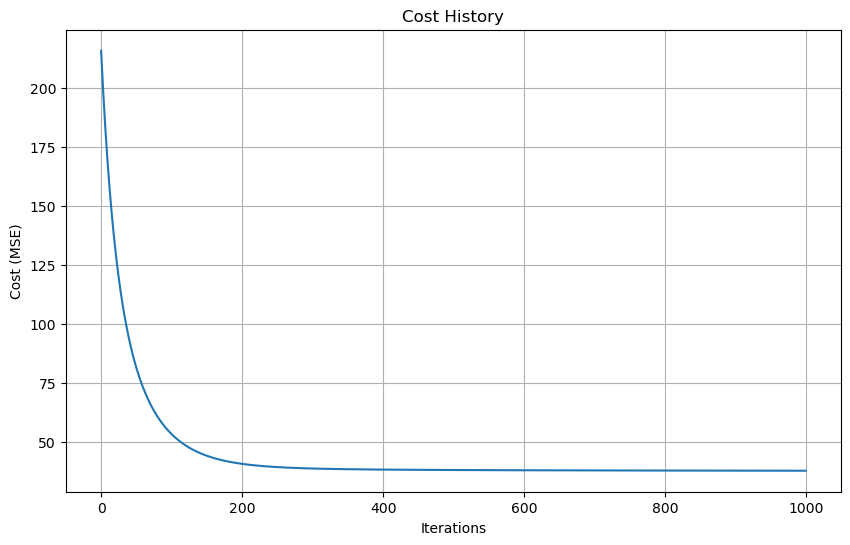

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(model.cost_history)
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.savefig('cost_history.png')
plt.show()

# ## 6. Evaluating

In [85]:
# R² score 
train_r2 = model.r2_score(X_train_scaled, y_train)
test_r2 = model.r2_score(X_test_scaled, y_test)

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

train_mae = mae(y_train, train_pred)
test_mae = mae(y_test, test_pred)

print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Train R² Score: 0.6976
Test R² Score: 0.4492
Train MAE: 3.6780
Test MAE: 3.8816


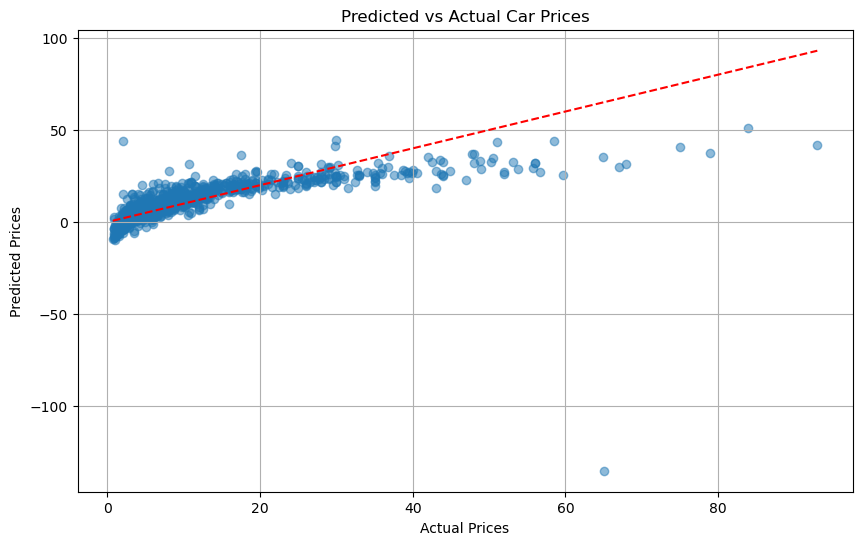

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test_scaled), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Car Prices')
plt.grid(True)
plt.savefig('predictions_vs_actual.png')
plt.show()